# SWMAL O1

**15-09-2023**

**[Gr10]**

1. Nina Thomsen - 202003675
2. Clara Mouritsen - 202006533
3. Marcin Szymanek - 202009418


**When seeing ** besides text or code, it is made with the help of ChatGBT or similar AI.*



## Python Basics


### Qa Load and test the `libitmal` module

In [1]:
from libitmal import utils as itmalutils

print(dir(itmalutils))

print("\nHere is the placement of the itmal:")
print(itmalutils.__file__)

print("\nTest function:")
itmalutils.TestAll()

['AssertInRange', 'CheckFloat', 'DToXy', 'GenerateConfusionMatrix', 'GenerateResults', 'InRange', 'Iterable', 'ListToMatrix', 'ListToVector', 'PrintMatrix', 'ResetRandom', 'ShowResult', 'TEST', 'TestAll', 'TestCheckFloat', 'TestPrintMatrix', 'TestVarName', 'VarName', 'XyToD', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'ctxlib', 'inf', 'inspect', 'isFloat', 'isList', 'isNumpyArray', 'nan', 'np', 'random', 're', 'sklearn']

Here is the placement of the itmal:
C:\Users\ninat\OneDrive\Skrivebord\Softwareteknologi\Machine-Learning\gitmal\libitmal\utils.py

Test function:
TestPrintMatrix...(no regression testing)
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
X=[[ 1.  2.]
   ...
   [ 1. -1.]]
X=[[   1.
       2.    ]
   [   3.0001
    -100.    ]
   [   1.
      -1.    ]]
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
OK
TEST: OK
ALL OK


### Qb Create your own module, with some functions, and test it

In [2]:
from libitmal import my_module as mym

print("Libriary placement:")
print(mym)

print("\nCalling self made module:")
print(mym.say_hello("Nina"))

Libriary placement:
<module 'libitmal.my_module' from 'C:\\Users\\ninat\\OneDrive\\Skrivebord\\Softwareteknologi\\Machine-Learning\\gitmal\\libitmal\\my_module.py'>

Calling self made module:
Hello, Nina!


### Qc How do you 'recompile' a module?

The load_ext is a command which loads the autoreload extension. 
The autoreload 2 means a module will reload everytime a cell is executed.

In [3]:
%load_ext autoreload
%autoreload 2

print(mym.say_hello("Clara"))
mym.new_hello()

Hello, Clara!
new hello


## Classes in Python

### Qe Extend the class with some public and private functions and member variables

#### Private variables
If the variables is named with a single leading underscore, it tells python that it should be treated as a internal or private variable. However it can still be accessed from the outside, so it is up to the programmer to respect the private variables. 
#### Private function
The same applies to function where a single underscore indicates it is meant to be private, but can still be accessed from the outside of the class. 

#### Self meaning
When working with classes in python, the term "self" refers to the instance of the class that is currently being used.
If you forget to include "self" in the parameter list, it will result in an error

Example:

In [4]:
class MyClass:
    def myfun(): # Missing self
        print("myfun")

myobjectx = MyClass()
        
myobjectx.myfun() # Will result in error as no self is provided

TypeError: MyClass.myfun() takes 0 positional arguments but 1 was given

### Qf Extend the class with a Constructor

#### Constructor 
In python a constructor is called an initilizer and is declared by writing __init__ with 2 underscores on both sides. It is automatically declared when an object of the class is created. 

#### Desctructor 
The descructor in python is declared with __del__ but is not required as the class makes one internally if none is provided. Additionallt python relies heavily on automatic garbage collection and reference counting like C#. 
The destructor is called when del obj is called. 

In [9]:
# **
class MyClass:
    def __init__(self, arg1, arg2):
        self.arg1 = arg1
        self.arg2 = arg2
        print("Constructor called")
    def __del__(self):
        print("Destructor called")
        
obj = MyClass("Hello", 42) #This will call the constructor
del obj #This will call the destructor

Constructor called
Destructor called


### Qg Extend the class with a to-string function

To serialize a class in python, you can use a method called __str__, which returns a string representation of the object, allowing to "print" the class instance as a string.
The __str__ method is called whenever you use the str() function or try to convert an object to a string using str(object).

In [10]:
# **
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def __str__(self):
        return f"Person(name='{self.name}', age={self.age})"

person = Person("Nina", 27)

# Using __str__ method to get a string representation of the object
string_representation = str(person)

print(string_representation)

Person(name='Nina', age=27)


## Intro

This exercise will touch the concepts of linear regression and the R2 score. We will calculate teta0 and teta1 which corresponds to A and B in y = Ax + B. 

### Setup

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

ModuleNotFoundError: No module named 'numpy'

In [12]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


In [13]:
datapath = os.path.join("./datasets", "lifesat", "")

# NOTE: a ! prefix makes us able to run system commands..
# (command 'dir' for windows, 'ls' for Linux or Macs)
#

! dir

print("\nOK")

 Volume in drive C has no label.
 Volume Serial Number is 5875-4FB0

 Directory of C:\Users\ninat\OneDrive\Skrivebord\Softwareteknologi\Machine-Learning\Afleveringer\Aflevering1_git\swmal_grp10

14-09-2023  10:05    <DIR>          .
08-09-2023  11:58    <DIR>          ..
10-09-2023  16:06    <DIR>          .ipynb_checkpoints
10-09-2023  15:45            24.815 cost_function.ipynb
08-09-2023  13:48    <DIR>          datasets
10-09-2023  17:22            42.754 dummy_classifier.ipynb
10-09-2023  15:36           309.094 intro.ipynb
10-09-2023  15:24             9.379 modules_and_classes.ipynb
14-09-2023  10:05            75.627 O1_swmal_grp10.ipynb
10-09-2023  16:57            17.563 performance_metrics.ipynb
               6 File(s)        479.232 bytes
               4 Dir(s)  111.766.945.792 bytes free

OK


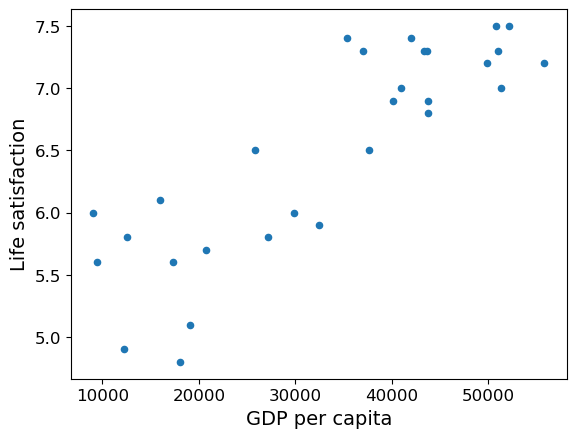

[[5.96242338]]
OK


In [19]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"SWMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)


print("OK")

### Qa) The $\theta$ parameters and the $R^2$ Score

In this exercise we will find $\theta0$ and $\theta1$ from the aboves  OECD's life satisfactory score per BNP for a country. 

$\theta0$ and $\theta1$ corresponds to A and B, respectively, in the linear regression formular: Ax + B

To exract these parameters using sklearn.linear_model.LinearRegression, we use the build in intercept_ and coef_.

In [4]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) 
print()

# Get Theta 0 = predict at x == 0
t0 = model.intercept_
print("Theta 0\n", t0)
print()

# Get Theta 1
t1 = model.coef_
print("Theta 1\n", t1)
print()

# Get R2
r2 = model.score(X,y)

print("R2 Score = ", r2)

NameError: name 'model' is not defined

*The coefficient of determination, denoted as 𝑅² (R-squared), measures the goodness of fit of a linear regression model to the data. It represents the proportion of the variance in the dependent variable (y) that can be explained by the independent variables (x) in the model.

𝑅² can range from 0 to 1, and its interpretation is as follows:

𝑅² = 0: The model explains none of the variance in the dependent variable, indicating a poor fit.
0 < 𝑅² < 1: The model explains some of the variance, with higher values indicating a better fit.
𝑅² = 1: The model explains all of the variance, indicating a perfect fit where the observed values exactly match the predicted values.

In practical applications, 𝑅² values typically range between 0 and 1, with higher values indicating a better fit of the linear regression model to the data. However, it's important to note that a high 𝑅² does not necessarily mean that the model is the best choice for making predictions, as it may still have other limitations such as overfitting. It's essential to consider other factors and evaluate the model's performance comprehensively.



## The Merits of the Fit-Predict Interface

We replace the linear regression model from above with k-nearest neighbour instead. 

### Qb) Using k-Nearest Neighbors

Change the linear regression model to a `sklearn.neighbors.KNeighborsRegressor` with k=3 (as in [HOML:p.22,bottom]), and rerun the `fit` and `predict` using this new model.

What do the k-nearest neighbours estimate for Cyprus, compared to the linear regression (it should yield=5.77)?

What _score-method_ does the k-nearest model use, and is it comparable to the linear regression model? 

Seek out the documentation in Scikit-learn, if the scoring methods are not equal, can they be compared to each other at all then?

Remember to put pointer/text from the Sckikit-learn documentation in the journal...(did you find the right kNN model etc.)

In [ ]:
# this is our raw data set:
sample_data

In [ ]:
# and this is our preprocessed data
country_stats

In [5]:
import sklearn.neighbors
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

cyprus_gdp = 22587

# Select and train a model
knn = sklearn.neighbors.KNeighborsRegressor(3)

knn.fit(X, y)

cyprus_score = knn.predict([[22587]])
score = knn.score(X, y)

print("Cyprus life satisfaction = ", cyprus_score, ", model R2 score = ", score)

ModuleNotFoundError: No module named 'sklearn'

The score used in knearest neighbours regressor is the same as used in linear regression and they can be compared in how well the data fits

### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

But that not the full story. Try plotting the prediction for both models in the same graph and tune the `k_neighbor` parameter of the `KNeighborsRegressor` model.  

Choosing `k_neighbor=1` produces a nice `score=1`, that seems optimal...but is it really so good?

Plotting the two models in a 'Life Satisfaction-vs-GDP capita' 2D plot by creating an array in the range 0 to 60000 (USD) (the `M` matrix below) and then predict the corresponding y value will sheed some light to this. 

Now reusing the plots stubs below, try to explain why the k-nearest neighbour with `k_neighbor=1` has such a good score.

Does a score=1 with `k_neighbor=1`also mean that this would be the prefered estimator for the job?

Hint here is a similar plot of a KNN for a small set of different k's:

<img src="https://itundervisning.ase.au.dk/SWMAL/L01/Figs/regression_with_knn.png"  alt="WARNING: could not get image from server." style="height:150px">

In [ ]:
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m
def compare_model_plots(model_0, model_1, sample_data, plt_text):
        sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
        plt.axis([0, 60000, 0, 10])

        # create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
        # and a step size of your choice
        

        # from this test M data, predict the y values via the lin.reg. and k-nearest models
        y_pred_lin = model_0.predict(M)
        y_pred_knn = model_1.predict(M)   # ASSUMING the variable name 'knn' of your KNeighborsRegressor 

        # use plt.plot to plot x-y into the sample_data plot..
        plt.plot(m, y_pred_lin, "r")
        plt.plot(m, y_pred_knn, "b")
        plt.text(5000, 8.5, plt_text, color = "green")

def train_kmodel(dataX, dataY, neighbors):
        model = sklearn.neighbors.KNeighborsRegressor(neighbors)
        model.fit(X, y)
        return model


score_text = str(knn.score(X, y))
compare_model_plots(lin1, knn, sample_data, "K = 3, score: " + score_text)
knn_0 = train_kmodel(X, y, 6)
score_text = str(knn_0.score(X, y))
compare_model_plots(lin1, knn_0, sample_data, "K = 6, score: " + score_text)

knn_1 = train_kmodel(X, y, 10)
score_text = str(knn_1.score(X, y))
compare_model_plots(lin1, knn_1, sample_data, "K = 10, score:" + score_text)

knn_2 = train_kmodel(X, y, 1)
score_text = str(knn_2.score(X, y))
compare_model_plots(lin1, knn_2, sample_data, "K = 1, score: " + score_text)

# Despite the high score, the model with the highest score is not well suited for use
# This is because of a phenomenon called "Overfitting" - the system has to be able to "generalize" to predict new values
# When overfit, it's too prone to changes and will completely change its predictions with even minor changes to the data


### Qd) Trying out a Neural Network

Let us then try a Neural Network on the data, using the fit-predict interface allows us to replug a new model into our existing code.

There are a number of different NN's available, let's just hook into Scikit-learns Multi-Layer Perceptron for regression, that is an 'MLPRegressor'. 

Now, the data-set for training the MLP is really not well scaled, so we need to tweak a lot of parameters in the MLP just to get it to produce some sensible output: with out preprocessing and scaling of the input data, `X`, the MLP is really a bad choice of model for the job since it so easily produces garbage output. 

Try training the `mlp` regression model below, predict the value for Cyprus, and find the `score` value for the training set...just as we did for the linear and KNN models.

Can the `MLPRegressor` score function be compared with the linear and KNN-scores?

In [ ]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X, y.ravel())



# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 
y_pred_lin = lin1.predict(M)
y_pred_knn = knn_1.predict(M)
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

cyp = mlp.predict([[22587]])
mlp_score = mlp.score(X, y)

print("Cyprus prediction: ", cyp)
print("mlp_score : ", mlp_score)

# SWMAL Exercise

## Mathematical Foundation

### Vector and matrix representation in python

Say, we have $d$ features for a given sample point. This $d$-sized feature column vector for a data-sample $i$ is then given by

$$
    \newcommand\rem[1]{}
    \rem{SWMAL: CEF def and LaTeX commands, remember: no newlines in defs}
    \newcommand\eq[2]{#1 &=& #2\\}
    \newcommand\ar[2]{\begin{array}{#1}#2\end{array}}
    \newcommand\ac[2]{\left[\ar{#1}{#2}\right]}
    \newcommand\st[1]{_{\scriptsize #1}}
    \newcommand\norm[1]{{\cal L}_{#1}}
    \newcommand\obs[2]{#1_{\mbox{\scriptsize obs}}^{\left(#2\right)}}
    \newcommand\diff[1]{\mbox{d}#1}
    \newcommand\pown[1]{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\mbox{\scriptsize test}}}
    \def\powtrain{\pown{\mbox{\scriptsize train}}}
    \def\bX{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bw{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
\bx\powni = 
    \ac{c}{
        x_1\powni \\
        x_2\powni \\ 
        \vdots \\
        x_d\powni
     }  
$$

or typically written transposed to save as

$$
    \bx\powni = \left[  x_1\powni~~ x_2\powni~~ \cdots~~ x_d\powni\right]^T
$$

such that $\bX$ can be constructed of the full set of $n$ samples of these feature vectors

$$
    \bX = 
      \ac{c}{
        (\bx\pown{1})^T \\
        (\bx\pown{2})^T \\
        \vdots \\
        (\bx\pownn)^T
      }
$$

or by explicitly writing out the full data matrix $\bX$ consisting of scalars 

$$
    \bX =
        \ac{cccc}{
            x_1\pown{1} & x_2\pown{1} & \cdots & x_d\pown{1} \\
            x_1\pown{2} & x_2\pown{2} & \cdots & x_d\pown{2}\\
            \vdots      &             &        & \vdots \\
            x_1\pownn   & x_2\pownn   & \cdots & x_d\pownn\\
        }
$$



but sometimes the notation is a little more fuzzy, leaving out the transpose operator for $\mathbf x$ and in doing so just interpreting the $\mathbf{x}^{(i)}$'s to be row vectors instead of column vectors.

The target column vector, $\mathbf y$, also has the dimension $n$ 

$$
    \by = \ac{c}{
            y\pown{1} \\
            y\pown{2} \\
            \vdots \\
            y\pownn \\
          }
$$

#### Qa Given the following $\mathbf{x}^{(i)}$'s, construct and print the $\mathbf X$ matrix in python.

$$
    \ar{rl}{
      \bx\pown{1} &= \ac{c}{ 1, 2, 3}^T \\
      \bx\pown{2} &= \ac{c}{ 4, 2, 1}^T \\
      \bx\pown{3} &= \ac{c}{ 3, 8, 5}^T \\
      \bx\pown{4} &= \ac{c}{-9,-1, 0}^T
    }
$$

##### Implementation Details

Notice that the ```np.matrix``` class is getting deprecated! So, we use numpy's ```np.array``` as matrix container. Also, __do not__ use the built-in python lists or the numpy matrix subclass.

In [ ]:
# Qa

import numpy as np

y = np.array([1,2,3,4]) # NOTE:  you'll need this later

X = np.ndarray(shape=(4, 3))

x_0 = np.array([1, 2, 3])
x_1 = np.array([4, 2 ,1])
x_2 = np.array([3, 8, 5])
x_3 = np.array([-9, -1, 0])

x = [x_0, x_1, x_2, x_3]

for i, item in enumerate(x):
    X[i] = item

print(X)

### Norms, metrics or distances

The $\norm{2}$ Euclidian distance, or norm, for a vector of size $n$ is defined as 

$$
    \norm{2}:~~ ||\bx||_2 = \left( \sum_{i=1}^{n} |x_i|^2 \right)^{1/2}\\
$$

and the distance between two vectors is given by

$$
    \ar{ll}{      
          \mbox{d}(\bx,\by) &= ||\bx-\by||_2\\
                     &= \left( \sum_{i=1}^n \left| x_{i}-y_{i} \right|^2 \right)^{1/2}
    }
$$ 

This Euclidian norm is sometimes also just denoted as $||\bx||$, leaving out the 2 in the subscript.

The squared $\norm{2}$ for a vector can compactly be expressed via 

$$
    \norm{2}^2: ||\bx||_2^2 = \bx^\top\bx
$$


The $\norm{1}$ 'City-block' norm is given by

$$
    \norm{1}:~~ ||\bx||_1 = \sum_i |x_i|
$$

but $\norm{1}$ is not used as intensive as its more popular $\norm{2}$ cousin. 

Notice that $|x|$ in code means ```fabs(x)```.

#### Qb Implement the $\norm{1}$ and $\norm{2}$ norms for vectors in python.

First implementation must be a 'low-level'/explicit implementation---using primitive/build-in functions, like ```+```, ```*``` and power ```**``` only! The square-root function can be achieved via power like ```x**0.5```.

Do NOT use any methods from libraries, like ```math.sqrt```, ```math.abs```, ```numpy.linalg.inner```, ```numpy.dot()``` or similar. Yes, using such libraries is an efficient way of building python software, but in this exercise we want to explicitly map the mathematichal formulaes to python code.

Name your functions L1 and L2 respectively, they both take one vector as input argument.

But test your implementation against some built-in functions, say  ```numpy.linalg.norm```

When this works, and passes the tests below, optimize the $\norm{2}$, such that it uses np.numpy's dot operator instead of an explicit sum, call this function ```L2Dot```. This implementation, ```L2Dot```, must be pythonic, i.e. it must not contain explicit for- or while-loops.

In [ ]:
def l1(x: np.array):
    if type(x) == list:
        x = np.array(x)
    if x.ndim != 1:
        raise ValueError("l1: Input must be a 1 dimensional array. Actual dimensions: " + str(x.ndim))
    if not len(x) > 1:
        raise ValueError("l1: Length of input must be bigger than 1")
    
    sum = 0
    for item in x:
        if(item < 0):
            item = -item
        sum += item
    return sum

def l2(x: np.array):
    if type(x) == list:
        x = np.array(x)
    if x.ndim != 1: 
        raise ValueError("l1: Input must be a 1 dimensional array. Actual dimensions: " + str(x.ndim))
    if not len(x) > 1:
        raise ValueError("l1: Length of input must be bigger than 1")
    
    sum_of_exp2 = 0
    
    for item in x:
        if(item < 0):
            item = -item
        sum_of_exp2 += item**2
    return sum_of_exp2**(1/2)

def l2dot(x: np.array):
    result = np.sqrt(np.dot(np.transpose(x), x))
    return result

# TEST vectors: here I test your implementation...calling your L1() and L2() functions
tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1=8.0
expected_d2=4.242640687119285

d1=l1(tx-ty)
d2=l2(tx-ty)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps=1E-9 
# NOTE: remember to import 'math' for fabs for the next two lines..

import math

assert math.fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert math.fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 

print("OK(part-1)")



# comment-in once your L2Dot fun is ready...
d2dot=l2dot(tx-ty)
print("d2dot-expected_d2=",d2dot-expected_d2)
assert math.fabs(d2dot-expected_d2)<eps, "L2Ddot dist seem to be wrong" 
print("OK(part-2)")

## The cost function, $J$



### Cost function in vector/matrix notation using $\norm{2}$



#### Loss or Objective Function using the Mean Squared Error

This formulation is equal to the definition of the _mean-squared-error_, MSE (or indirectly also RMSE), here given in the general formulation for some random variable $Z$ 

$$
    \ar{rl}{
        \mbox{MSE} &= \frac{1}{n} \sum_{i=1}^{n} (\hat{Z}_i-Z_i)^2 = \frac{1}{n} SS\\
        \mbox{RMSE} &= \sqrt{\mbox{MSE}}\
    }
$$

with sum-of-squares (SS) is given simply by

$$
    \mbox{SS} = \sum_{i=1}^{n} (\hat{Z}_i-Z_i)^2\\
$$


So, using the $\norm{2}$ for the distance metric, is equal to saying that we want to minimize $J$ with respect to the MSE

$$
    \ar{rl}{
        J &= \mbox{MSE}(h(\bX), \by\st{true}) \\
          &= \mbox{MSE}(\by\st{pred}~, \by\st{true}) \\
          &= \mbox{MSE}(\hat{\by}, \by\st{true})
     }
$$

Note: when minimizing one can ignore the constant factor $1/n$ and it really does not matter if you minimize MSE or RMSE. Often $J$ is also multiplied by 1/2 to ease notation when trying to differentiate it.

$$
    \ar{rl}{
        J(\bX,\by\st{true};\btheta) &\propto \half ||\by\st{pred} - \by\st{true} ||_2^2 \\
          &\propto \mbox{MSE}
     }
$$

### MSE

Now, let us take a look on how you calculate the MSE.

The MSE uses the $\norm{2}$ norm internally, well, actually $||\cdot||^2_2$ to be precise, and basically just sums, means and roots the individual (scalar) losses (distances), we just saw before. 

And the RMSE is just an MSE with a final square-root call.

### Qc Construct the Root Mean Square Error (RMSE) function (Equation 2-1 [HOML]).

Call the function RMSE, and evaluate it using the $\bX$ matrix and $\by$ from Qa.

We implement a dummy hypothesis function, that just takes the first column of $\bX$ as its 'prediction'

$$
    h\st{dummy}(\bX) = \bX(:,0)
$$

Do not re-implement the $\norm{2}$ for the RMSE function, but call the '''L2''' function you just implemented internally in RMSE.

In [ ]:
def RMSE2(y_pred: np.ndarray, y_true: np.ndarray):
    if(len(y_pred) != len(y_true)):
        raise ValueError("RMSE2: Inconsistent size of arrays: " + str(len(y_pred)) + " , " + str(len(y_true)))
    
    diff_sqr = [(x - y)**2 for x, y in zip(y_pred, y_true)]
    sos = l1(diff_sqr)
    mse = 1/len(y_pred) * (sos)
    rmse = np.sqrt(mse)
    return rmse

def RMSE(y_pred: np.ndarray, y_true: np.ndarray):
    if(len(y_pred) != len(y_true)):
        raise ValueError("RMSE: Inconsistent size of arrays: " + str(len(y_pred)) + " , " + str(len(y_true)))
    
    l2res = l2(1/2*(y_pred - y_true))
    print(l2res)
    rmse = np.sqrt(l2res)
    
    
# Dummy h function:
def h(X):    
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

# Calls your RMSE() function:
r=RMSE2(h(X),y)

# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print("OK")

### MAE

#### Qd Similar construct the Mean Absolute Error (MAE) function (Equation 2-2 [HOML]) and evaluate it.

The MAE will algorithmic wise be similar to the MSE part from using the $\norm{1}$ instead of the $\norm{2}$ norm.

Again, re-implementation of the$\norm{1}$ is a no-go, call the '''L1''' instead internally i MAE.

In [ ]:
def MAE(y_pred, y_true):
    if(len(y_pred) != len(y_true)):
        raise ValueError("MAE: Inconsistent size of arrays: " + str(len(y_pred)) + " , " + str(len(y_true)))
    
    # MAE = averaged sum of differences
    mae = (1/len(y_pred)) * l1(y_pred - y_true)
    return mae

# Calls your MAE function:
r=MAE(h(X), y)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "MAE dist seems to be wrong" 

print("OK")

## Pythonic Code

### Robustness of Code

Data validity checking is an essential part of robust code, and in Python the 'fail-fast' method is used extensively: instead of lingering on trying to get the 'best' out of an erroneous situation, the fail-fast pragma will be very loud about any data inconsistencies at the earliest possible moment.

Hence robust code should include a lot of error checking, say as pre- and post-conditions (part of the design-by-contract programming) when calling a function: when entering the function you check that all parameters are ok (pre-condition), and when leaving you check the return parameter (post-conditions).  

Normally assert-checking or exception-throwing will do the trick just fine, with the exception method being more _pythonic_.

For the norm-function you could, for instance, test your input data to be 'vector' like, i.e. like

```python
    assert x.shape[0]>=0 and x.shape[1]==0
    
    if not x.ndim==1:
        raise some error
```
or similar.

#### Qe Robust Code 

Add error checking code (asserts or exceptions), that checks for right $\hat\by$-$\by$ sizes of the MSE and MAE functions.

Also add error checking to all you previously tested L2() and L1() functions, and re-run all your tests.

In [ ]:
print("Qe ok!")

### Qf Conclusion


In [ ]:
print("""
    The exercises above have a couple of different purposes:
    * Get practice in programming mathematical functions in Python (Translating mathematical formulas to a Python syntax)
    * Get practice in working with numpy arrays and basic array manipulation
    * Get insight into the performance metrics that can be used to measure effectiveness of a prediction model (RMSE, MAE)
    * Understand the importance of the cost function, and learn to implement different cost functions
    
    The last part is especially important because it feeds into the learning system: minimizing the cost function results should theoretically train 
    the machine learning model
    

    """)

REVISIONS||
---------||
2018-12-18| CEF, initial.                  
2019-01-31| CEF, spell checked and update. 
2019-02-04| CEF, changed d1/d2 in Qb to L1/L2. Fixe rev date error.
2019-02-04| CEF, changed headline.
2019-02-04| CEF, changed (.) in dist(x,y) to use pipes instead.
2019-02-04| CEF, updated supervised learning fig, and changed , to ; for thetas, and change = to propto.
2019-02-05| CEF, post lesson update, minor changes, added fabs around two test vectors.
2019-02-07| CEF, updated def section. 
2019-09-01| CEF, updated for ITMAL v2.
2019-09-04| CEF, updated for print-f and added conclusion Q.
2019-09-05| CEF, fixed defect in print string and commented on fabs.
2020-01-30| CEF, F20 ITMAL update.
2020-02-03| CEF, minor text fixes.
2020-02-24| CEF, elaborated on MAE and RMSE, emphasized not to use np functionality in L1 and L2.
2020-09-03| CEF, E20 ITMAL update, updated figs paths.
2020-09-06| CEF, added alt text.
2020-09-07| CEF, updated HOML page refs.
2021-01-12| CEF, F21 ITMAL update, moved revision table.
2021-02-09| CEF, elaborated on test-vectors. Changed order of Design Matrix descriptions.
2021-08-02| CEF, update to E21 ITMAL.
2022-01-25| CEF, update to F22 SWMAL.
2022-02-25| CEF, removed inner product equations.
2022-08-30| CEF, updated to v1 changes.
2023-02-07| CEF, minor update for d.

# SWMAL Exercise

## Implementing a dummy binary-classifier with fit-predict interface

We begin with the MNIST data-set and will reuse the data loader from Scikit-learn. Next we create a dummy classifier, and compare the results of the SGD and dummy classifiers using the MNIST data...

#### Qa  Load and display the MNIST data

There is a `sklearn.datasets.fetch_openml` dataloader interface in Scikit-learn. You can load MNIST data like 

```python
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784',??) # needs to return X, y, replace '??' with suitable parameters! 
# Convert to [0;1] via scaling (not always needed)
#X = X / 255.
```

but you need to set parameters like `return_X_y` and `cache` if the default values are not suitable! 

Check out the documentation for the `fetch_openml` MNIST loader, try it out by loading a (X,y) MNIST data set, and plot a single digit via the `MNIST_PlotDigit` function here (input data is a 28x28 NMIST subimage)

```python
%matplotlib inline
def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
```

Finally, put the MNIST loader into a single function called `MNIST_GetDataSet()` so you can reuse it later.

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd

# mnist 784 dataset has id == 554: https://www.openml.org/search?type=data&status=active&id=554

def MNIST_GetDataSet() -> pd.DataFrame:
    X, y = fetch_openml(version="active", data_id=554, return_X_y=True)
    return X, y

%matplotlib inline
def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

In [ ]:
X, y = MNIST_GetDataSet()    

In [ ]:
import numpy as np

# Test drawing from data. pd.DataFrame.loc[x] allows indexing pandas rows. reshape() is a numpy method, so convert to numpy array first
MNIST_PlotDigit(X.loc[15].to_numpy())

#### Qb  Add a Stochastic Gradient Decent [SGD] Classifier

Create a train-test data-set for MNIST and then add the `SGDClassifier` as done in [HOML], p.103.

Split your data and run the fit-predict for the classifier using the MNIST data.(We will be looking at cross-validation instead of the simple fit-predict in a later exercise.)

Notice that you have to reshape the MNIST X-data to be able to use the classifier. It may be a 3D array, consisting of 70000 (28 x 28) images, or just a 2D array consisting of 70000 elements of size 784.

A simple `reshape()` could fix this on-the-fly:
```python
X, y = MNIST_GetDataSet()

print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)
```

Remember to use the category-5 y inputs

```python
y_train_5 = (y_train == '5')    
y_test_5  = (y_test == '5')
```
instead of the `y`'s you are getting out of the dataloader. In effect, we have now created a binary-classifier, that enable us to classify a particular data sample, $\mathbf{x}(i)$ (that is a 28x28 image), as being a-class-5 or not-a-class-5. 

Test your model on using the test data, and try to plot numbers that have been categorized correctly. Then also find and plots some misclassified numbers.

In [ ]:
# Split the data to training and test sets

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X.shape)
print(y_train.dtype)
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [ ]:
from sklearn.linear_model import SGDClassifier

# Create a SGD classifier model and train it (fit)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

In [ ]:
# Predict

sgd_predictions = sgd_clf.predict(X_test)

print(len(X_test))
print(len(sgd_predictions))
# Get indices of True predictions to draw them later
indices = []
for index, val in enumerate(sgd_predictions):
    if(val == True):
        indices.append(index)

# Classified this many numbers as '5'
print(len(indices))
print("Ok")

In [ ]:
MNIST_PlotDigit(X_test.iloc[indices[0]].to_numpy())
print(y_test_5.iloc[indices[0]])

In [ ]:
MNIST_PlotDigit(X_test.iloc[indices[1]].to_numpy())
print(y_test_5.iloc[indices[1]])

In [ ]:
MNIST_PlotDigit(X_test.iloc[indices[2]].to_numpy())
print(y_test_5.iloc[indices[2]])

In [ ]:
MNIST_PlotDigit(X_test.iloc[indices[3]].to_numpy())
print(y_test_5.iloc[indices[3]])

In [ ]:
# Misclassified as 5
MNIST_PlotDigit(X_test.iloc[indices[6]].to_numpy())
print(y_test_5.iloc[indices[6]])

In [ ]:
# Misclassified
MNIST_PlotDigit(X_test.iloc[indices[8]].to_numpy())
print(y_test_5.iloc[indices[8]])

In [ ]:
MNIST_PlotDigit(X_test.iloc[indices[13]].to_numpy())
print(y_test_5.iloc[indices[13]])

#### Qc Implement a dummy binary classifier

Now we will try to create a Scikit-learn compatible estimator implemented via a python class. Follow the code found in [HOML], p.107 (for [HOML] 1st and 2nd editions: name you estimator `DummyClassifier` instead of `Never5Classifyer`).

Here our Python class knowledge comes into play. The estimator class hierarchy looks like

<img src="https://itundervisning.ase.au.dk/SWMAL/L02/Figs/class_base_estimator.png" alt="WARNING: could not get image from server." style="width:500px">

All Scikit-learn classifiers inherit from `BaseEstimator` (and possibly also `ClassifierMixin`), and they must have a `fit-predict` function pair (strangely not in the base class!) and you can actually find the `sklearn.base.BaseEstimator` and `sklearn.base.ClassifierMixin` python source code somewhere in you anaconda install dir, if you should have the nerves to go to such interesting details.

But surprisingly you may just want to implement a class that contains the `fit-predict` functions, ___without inheriting___ from the `BaseEstimator`, things still work due to the pythonic 'duck-typing': you just need to have the class implement the needed interfaces, obviously `fit()` and `predict()` but also the more obscure `get_params()` etc....then the class 'looks like' a `BaseEstimator`...and if it looks like an estimator, it _is_ an estimator (aka. duck typing).

Templates in C++ also allow the language to use compile-time duck typing!

> https://en.wikipedia.org/wiki/Duck_typing

Call the fit-predict on a newly instantiated `DummyClassifier` object, and find a way to extract the accuracy `score` from the test data. You may implement an accuracy function yourself or just use the `sklearn.metrics.accuracy_score` function. 

Finally, compare the accuracy score from your `DummyClassifier` with the scores found in [HOML] "Measuring Accuracy Using Cross-Validation", p.107. Are they comparable? 

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Classifies EVERYTHING in the most frequent class (here: not 5 because most of the images are not 5)
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
dummy_y = dummy_clf.predict(X_test)

# Uses 'jaccard score' function, see: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
a_s_dummy = accuracy_score(y_test_5, dummy_y)

c_v_s_dummy = cross_val_score(dummy_clf, X_train, y_train_5, cv = 3, scoring="accuracy")
print(a_s_dummy)
print(c_v_s_dummy)
# Scores are comparable. Scores are 0.91 because roughly 0.09 of images contain number '5'

### Qd Conclusion


In [ ]:

print("""
    These exercises are our first dive into the concept of using machine learning for classifications. The main purpose of the exercises are:
    * Learn the basics of using api to download data from OpenML
    * Split data into training and test set
    * Use Stochastic Gradient Classifier to classify a dataset: our first binary classificator
    * Train on training set, test on test set
    * Notice that while the classifications will work in many cases, there will be mistakes both in false positives and false negatives
    * Use dummy classifier, understand the scores from sklearn.metrics.accuracy_score() and sklearn.model_selection.cross_val_score
    * Understand that the relatively high score is connected to low occurence of classified value, NOT the high accuracy of a machine learning model
""")

# SWMAL Exercise


## Performance Metrics



### Nomenclature



### Precision


### Recall or Sensitivity


### Accuracy


#### Accuracy Paradox



### F-score




## Confusion Matrix

with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

### Nomenclature for the Confusion Matrix



#### Qa Implement the Accuracy function and test it on the MNIST data.

We now follow the convention in Scikit-learn, that a score funtion takes the arguments `y_true` and then `y_pred`

```
    sklearn.metrics.accuracy_score(y_true, y_pred, ..)
```

Implement a general accuracy function `MyAccuracy(y_true, y_pred)`. Again, implement the function you self from scratch, i.e. do not use any helper functions from Scikit-learn (implementing via `sklearn.metrics.confusion_matrix` is also not allowed, othewise you will then learn nothing!)

Reuse your MNIST data loader and test the `MyAccuracy` function  both on your dummy classifier and on the Stochastic Gradient Descent classifier (with setup parameters as in [HOML]).

Compare your accuracy score with the acutal value from `sklearn.metrics.accuracy_score()`.

(Implementation note: what do you do, if the denominator is zero?)

In [ ]:
def MyAccuracy(y_true, y_pred):
    if len(y_true) == 0: # in case the y_true is empty
        return 0;
    # Calculate the accuracy by comparing y_true and y_pred
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    accuracy = correct / total
    return accuracy  
    
# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestAccuracy(y_true, y_pred):
    a0=MyAccuracy(y_true, y_pred)
    a1=accuracy_score(y_true, y_pred)

    print(f"\nmy a          ={a0}")
    print(f"scikit-learn a={a1}")
    
TestAccuracy(y_test_5, sgd_predictions)
TestAccuracy(y_test_5, dummy_y)

#    # do some numerical comparison here, like
#    #  if fabs(a0-a1)<eps then ..

#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

Now, implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn...

(Implementation note: as before, what do you do, if the denominator is zero?)

In [ ]:
def MyPrecision(y_true, y_pred):
     # Check if the lengths of y_true and y_pred are the same
    if len(y_true) != len(y_pred):
        raise ValueError("Input arrays y_true and y_pred must have the same length.")
    
    # Counter
    true_positives = 0
    false_positives = 0
    
     # Iterate through y_true and y_pred and find true positives and false positives
    for true_label, pred_label in zip(y_true, y_pred):
        if true_label == 1 and pred_label == 1:
            true_positives += 1 
        elif true_label == 0 and pred_label == 1:
            false_positives += 1
    
    # Handle case if denominator is zero
    if true_positives + false_positives == 0:
        return 0.0
    
    else:
        # Calculate precision
        precision = true_positives / (true_positives + false_positives)
        return precision
    

def MyRecall(y_true, y_pred):
     # Same check as in MyPrecision
    if len(y_true) != len(y_pred):
        raise ValueError("Input arrays y_true and y_pred must have the same length.")
        
    true_positives = 0
    false_negatives = 0

    # Iterate through each pair of true and predicted labels
    for true_label, pred_label in zip(y_true, y_pred):
        if true_label == 1 and pred_label == 1:
            true_positives += 1
        elif true_label == 1 and pred_label == 0:
            false_negatives += 1
            
    # Handle case if denominator is zero
    if true_positives + false_negatives == 0:
        return 0.0
    else:
        # Calculate recall as the ratio of true positives to (true positives + false negatives)
        recall = true_positives / (true_positives + false_negatives)
        return recall
    
def MyF1Score(y_true, y_pred):
     # Calculate precision 
    precision = MyPrecision(y_true, y_pred)
    # Calculate recall
    recall = MyRecall(y_true, y_pred)

    # Handle the case when both precision and recall are zero
    if precision + recall == 0:
        return 0.0
    else:
        # Calculate F1-score as the harmonic mean of precision and recall
        f1_score = 2 * (precision * recall) / (precision + recall)
        return f1_score
    
# TEST FUNCTIONS
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def TestPrecision(y_true, y_pred):
    a0=MyPrecision(y_true, y_pred)
    a1=precision_score(y_true, y_pred)

    print(f"\nmy p          ={a0}")
    print(f"scikit-learn p={a1}")
    
def TestRecall(y_true, y_pred):
    a0=MyRecall(y_true, y_pred)
    a1=recall_score(y_true, y_pred)

    print(f"\nmy r          ={a0}")
    print(f"scikit-learn r={a1}")
    
def TestF1Score(y_true, y_pred):
    a0=MyF1Score(y_true, y_pred)
    a1=f1_score(y_true, y_pred)

    print(f"\nmy f1          ={a0}")
    print(f"scikit-learn f1={a1}")
    
# TEST CODE SGD
TestPrecision(y_test_5, sgd_predictions)
TestRecall(y_test_5, sgd_predictions)
TestF1Score(y_test_5,sgd_predictions)

# TEST CODE DUMMY
TestPrecision(y_test_5, dummy_y)
TestRecall(y_test_5, dummy_y)
TestF1Score(y_test_5,dummy_y)

#### Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Generate the confusion matrix for both the Dummy and the SGD classifier using the `scklearn.metrics.confusion_matrix` function. 

I got the two confusion matrices

```
M_dummy=[[18166     0]
        [ 1834     0]]
   
M_SDG=[[17618   548]
      [  267  1567]]

```
your data may look similar (but not 100% equal).

How are the Scikit-learn confusion matrix organized, where are the TP, FP, FN and TN located in the matrix indices, and what happens if you mess up the parameters calling

```python
confusion_matrix(y_test_5_pred, y_test5)
```

instead of 
```python
confusion_matrix(y_test_5, y_test_5_pred)
```

In [ ]:
from sklearn.metrics import confusion_matrix

#Calling the function the right way
con_matrix = confusion_matrix(y_test_5, y_test_5_pred)
print(con_matrix)

#### Qd A Confusion Matrix Heat-map

Generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively, getting inspiration from [HOML] "Error Analysis", pp.122-125.

This heat map could be an important guide for you when analysing multiclass data in the future.

In [ ]:
# TODO: Qd
assert False, "TODO: solve Qd, and remove me..

### Qe Conclusion


We have dipped into the fundementals of performance metrics and the utitlity of the confusion matrix in assessing the effectiveness of machine learning models. We implemented and testet custom function for the four key metrics, which have provided a deeper understanding of their computation.

These metrics are essential tools for model evaluation, allowing us to asses not only the overall predictive power of a model(accuracy) but also its ability to avoid false positives(precision), its capacity to capture all relevant instances(recall) and the harmonious balance between precesion and recall(f1 score).

Through this exploration, we have gained valuable insights into the nuances of model performance evaluation, empowering us to make informed decisions and refine our machine learning models effectively.* 
